<a href="https://colab.research.google.com/github/Zaheer-Aswath/DataScience-Python/blob/main/Edureka/Final%20Project%20-%20Movie%20Recommendation%20Sysytems/Movie_Recommendation_System_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Used:**

https://www.kaggle.com/code/ayushimishra2809/movie-recommendation-system/data?select=ratings.csv

In [ ]:
## Step - 1: Importing required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
## Step - 2: Loading the ratings.csv and movies.csv data into a DataFrame:

## 2.1. Loading the ratings.csv into a DataFrame:

df_ratings = pd.read_csv("ratings.csv")
display(df_ratings)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [ ]:
## 2.2. Checking any null values in ratings dataFrame:

display(df_ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
## 2.3. Finding datatypes of ratings dataFrame:

display(df_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


None

In [ ]:
## 2.4. Loading the movies.csv into a DataFrame:

df_movies = pd.read_csv("movies.csv")
display(df_movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [ ]:
## 2.5. Checking any null values in movies dataFrame:

display(df_movies.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
## 2.6. Finding datatypes of movies dataFrame:

display(df_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


None

In [ ]:
## Step - 3: Merging both dataframe df_ratings and df_movies data into one DataFrame:

## 3.1 merge DataFrames with common column "movieId":

recommended_df = pd.merge(df_ratings, df_movies, on ='movieId')

print("Merged data frame:")
display(recommended_df)

Merged data frame:


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
...,...,...,...,...,...,...
105334,668,140098,2.5,1450415424,Runoff (2015),Drama
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller


In [ ]:
## 3.2 Checking shape of merged dataframe(recommended_df):

display(recommended_df.shape)

(105339, 6)

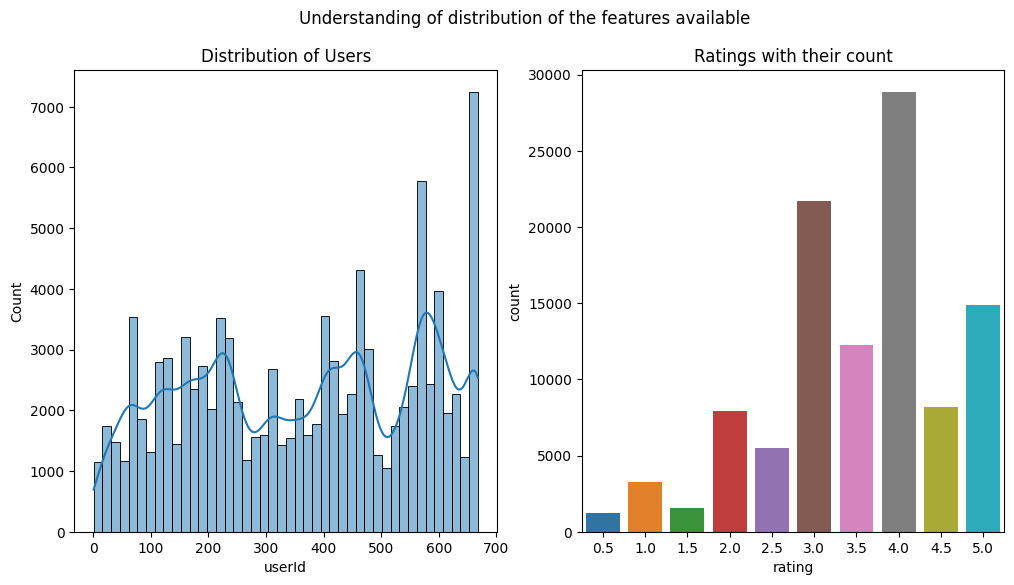

In [ ]:
## Step - 4: Exploratory Data Analysis including:

## Step - 4.1: Understanding of distribution of the features available:

figure, axes = plt.subplots(1, 2,figsize=(12, 6))
figure.suptitle('Understanding of distribution of the features available')
axes[0] = sns.histplot(x = recommended_df['userId'], kde = True, ax = axes[0])
axes[0].set_title("Distribution of Users")
axes[1] = sns.countplot(x = recommended_df["rating"], ax = axes[1])
axes[1].set_title("Ratings with their count")
plt.show()

1.   Analyzing the subplot(Distribution of Users) can give insights into the user distribution that the certain user ID ranges that are more densely populated, which might be indicative of a specific user group or behavior.

2.   Analyzing the subplot(Ratings with their count) can give insights into how ratings are distributed we can see a sense of the overall sentiment or preference of users

In [ ]:
## Step - 4.2: Finding unique users and movies:

## Finding unique users:

print("The Unique Users are:\n")
display(recommended_df["userId"].drop_duplicates().sort_values().reset_index(drop = True))

## Finding unique movies:

print("\nThe Unique Movies are:\n")
display(recommended_df["title"].drop_duplicates().sort_values().reset_index(drop = True))

The Unique Users are:



0        1
1        2
2        3
3        4
4        5
      ... 
663    664
664    665
665    666
666    667
667    668
Name: userId, Length: 668, dtype: int64


The Unique Movies are:



0                                           '71 (2014)
1              'Hellboy': The Seeds of Creation (2004)
2                               'Round Midnight (1986)
3                            'Til There Was You (1997)
4                                   'burbs, The (1989)
                             ...                      
10318    loudQUIETloud: A Film About the Pixies (2006)
10319                                       xXx (2002)
10320                   xXx: State of the Union (2005)
10321                            ¡Three Amigos! (1986)
10322        À nous la liberté (Freedom for Us) (1931)
Name: title, Length: 10323, dtype: object

In [ ]:
## Step - 4.3: Average rating and Total movies at genre level:

## Before finding Average rating and Total movies at genre level, we need to split genres columns data which have multiple genre for each movie:

recommended_df['genres'] = recommended_df['genres'].str.split('|')
recommended_df = recommended_df.explode('genres')

print("Dataframe(recommended_df) is splitted by genres columns:\n")
display(recommended_df)

Dataframe(recommended_df) is splitted by genres columns:



,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime
0,1,16,4.0,1217897793,Casino (1995),Drama
1,9,16,4.0,842686699,Casino (1995),Crime
1,9,16,4.0,842686699,Casino (1995),Drama
2,12,16,1.5,1144396284,Casino (1995),Crime
...,...,...,...,...,...,...
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy
105335,668,140816,2.5,1443288791,Tangerine (2015),Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller


In [ ]:
## Finding Average rating at genre level:

print("Finding Average rating at genre level:\n")
display(recommended_df.groupby("genres")["rating"].mean())

Finding Average rating at genre level:



genres
(no genres listed)    3.071429
Action                3.451450
Adventure             3.518027
Animation             3.635350
Children              3.439429
Comedy                3.420996
Crime                 3.642392
Documentary           3.643035
Drama                 3.650266
Fantasy               3.500459
Film-Noir             3.913636
Horror                3.281097
IMAX                  3.641821
Musical               3.571962
Mystery               3.652043
Romance               3.544255
Sci-Fi                3.454481
Thriller              3.495561
War                   3.783202
Western               3.565687
Name: rating, dtype: float64

In [ ]:
## Finding Total movies at genre level:

print("Finding Total movies at genre level:\n")
display(recommended_df.groupby("genres")["title"].count())

Finding Total movies at genre level:



genres
(no genres listed)        7
Action                31205
Adventure             23076
Animation              5966
Children               8098
Comedy                38055
Crime                 18291
Documentary            1206
Drama                 46960
Fantasy               10889
Film-Noir              1210
Horror                 7983
IMAX                   3032
Musical                4287
Mystery                8320
Romance               19094
Sci-Fi                16795
Thriller              29288
War                    5828
Western                2314
Name: title, dtype: int64

In [ ]:
## Step - 4.4: Unique genres considered:

## Checking Unique genres in genres column:
print("Genres in dataframe(recommended_df):\n")
display(recommended_df.genres.unique())

## Dropping "no genres listed" from genres column as it does not have impact:

recommended_df = recommended_df[recommended_df["genres"] != "(no genres listed)"]

## Unique genres considered:
print("\nUnique genres considered from dataframe(recommended_df):\n")
display(recommended_df.genres.unique())

Genres in dataframe(recommended_df):



array(['Crime', 'Drama', 'Sci-Fi', 'Mystery', 'Thriller', 'Action', 'War',
       'Adventure', 'IMAX', 'Comedy', 'Romance', 'Western', 'Horror',
       'Fantasy', 'Musical', 'Film-Noir', 'Children', 'Animation',
       'Documentary', '(no genres listed)'], dtype=object)


Unique genres considered from dataframe(recommended_df):



array(['Crime', 'Drama', 'Sci-Fi', 'Mystery', 'Thriller', 'Action', 'War',
       'Adventure', 'IMAX', 'Comedy', 'Romance', 'Western', 'Horror',
       'Fantasy', 'Musical', 'Film-Noir', 'Children', 'Animation',
       'Documentary'], dtype=object)

**Objective - 1: Popularity-based recommender system at a genre level**

Create a popularity-based recommender system at a genre level. User will input a genre (g), minimum ratings threshold (t) for a movie and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.

**Example:**

**Input:**

➢ Genre (g): Comedy

➢ Minimum reviews threshold (t): 100

➢ Num recommendations (N): 5

**Output:**

S.No Movie Title Average Movie Rating Num Reviews

1        A            4.5                 422

2        B            4.4                 495

3 C 4.3 342

4 D 4.22 531

5 E 4.21 454

In [ ]:
## Objective - 1.1 - Taking sample input:

g = "Comedy"
t = 100
N = 5

In [ ]:
## Objective - 1.2 - Calculating the No.of reviews from recommended_df dataframe:

count_reviews = recommended_df.groupby("title")["rating"].count().reset_index()

print("Calculating the No.of reviews from recommended_df dataframe:\n")
display(count_reviews)

Calculating the No.of reviews from recommended_df dataframe:



,title,rating
0,'71 (2014),4
1,'Hellboy': The Seeds of Creation (2004),5
2,'Round Midnight (1986),2
3,'Til There Was You (1997),6
4,"'burbs, The (1989)",20
...,...,...
10311,loudQUIETloud: A Film About the Pixies (2006),1
10312,xXx (2002),72
10313,xXx: State of the Union (2005),21
10314,¡Three Amigos! (1986),80


In [ ]:
## Objective - 1.3 - Calculating the Average ratings from recommended_df dataframe:

avg_reviews = recommended_df.groupby("title")["rating"].mean().reset_index()

print("Calculating the Average ratings from recommended_df dataframe:\n")
display(avg_reviews)

Calculating the Average ratings from recommended_df dataframe:



,title,rating
0,'71 (2014),3.500000
1,'Hellboy': The Seeds of Creation (2004),3.000000
2,'Round Midnight (1986),2.500000
3,'Til There Was You (1997),4.000000
4,"'burbs, The (1989)",3.125000
...,...,...
10311,loudQUIETloud: A Film About the Pixies (2006),4.500000
10312,xXx (2002),2.958333
10313,xXx: State of the Union (2005),2.071429
10314,¡Three Amigos! (1986),3.012500


In [ ]:
## Objective - 1.4 - Merging above two dataframes count_reviews and avg_reviews with help of common columns "title" and renaming columns names as per requirement:

popularity_based_df = pd.merge(avg_reviews, count_reviews, on ='title').rename(
    columns = {"title":"Movie Title","rating_x":"Average Movie Rating Num","rating_y":"Reviews"}
    )

print("Movies and their average reviews and ratings count:\n")
display(popularity_based_df)

Movies and their average reviews and ratings count:



,Movie Title,Average Movie Rating Num,Reviews
0,'71 (2014),3.500000,4
1,'Hellboy': The Seeds of Creation (2004),3.000000,5
2,'Round Midnight (1986),2.500000,2
3,'Til There Was You (1997),4.000000,6
4,"'burbs, The (1989)",3.125000,20
...,...,...,...
10311,loudQUIETloud: A Film About the Pixies (2006),4.500000,1
10312,xXx (2002),2.958333,72
10313,xXx: State of the Union (2005),2.071429,21
10314,¡Three Amigos! (1986),3.012500,80


In [ ]:
## Objective - 1.5 - Creating a popularity-based recommender system at a genre level.
   ## User will input a genre (g), minimum ratings threshold (t) for a movie and no. of recommendations(N) for which it should be recommended top N movies
      ## which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews:

## Before creating recommender system we need to filtering the data based on required conditions:

## 1.5.1. Genre(g) filter:

## Step - 1: getting the list of movies under mentioned genre:

genre_specific_movies = recommended_df[recommended_df['genres'] == g]['title'].unique()

print("Movies list as per User genre request:\n")
print(genre_specific_movies)

print("\nBefore filter:\n", popularity_based_df.shape)

## Step - 2: filtering the title from popularity_based_df:

popularity_based_df = popularity_based_df[popularity_based_df['Movie Title'].isin(genre_specific_movies)]
print("\nMovies filter as per user requested genres:\n")
display(popularity_based_df)                            #--> Movies filtered as per user requested genres

print("\nAfter filter:\n", popularity_based_df.shape)


Movies list as per User genre request:

['Clerks (1994)' 'Junior (1994)' 'Pulp Fiction (1994)' ...
 "While We're Young (2014)" 'Welcome to Me (2014)' 'Tangerine (2015)']

Before filter:
 (10316, 3)

Movies filter as per user requested genres:



,Movie Title,Average Movie Rating Num,Reviews
1,'Hellboy': The Seeds of Creation (2004),3.000000,5
4,"'burbs, The (1989)",3.125000,20
6,(500) Days of Summer (2009),3.932432,111
7,*batteries not included (1987),3.318182,44
9,10 (1979),2.000000,6
...,...,...,...
10299,Zookeeper (2011),3.000000,3
10300,Zoolander (2001),2.987179,39
10302,"Zorro, the Gay Blade (1981)",3.500000,2
10314,¡Three Amigos! (1986),3.012500,80



After filter:
 (3513, 3)


In [ ]:
## 1.5.2 Threshold filter(t) - To filter movies which has more than reviews mentioned by the user:

print("Before filter:\n", popularity_based_df.shape)

## filtering the df based on review count:

popularity_based_df = popularity_based_df[popularity_based_df['Reviews'] >= t]

print("After filter:\n", popularity_based_df.shape)

Before filter:
 (3513, 3)
After filter:
 (245, 3)


In [ ]:
## 1.5.3 Num recommendations (N) filter - To sort(Descending) number of movies based on average ratings and after giving filtering "genres" and "threshold":

## Assuming your dataframe is named 'popularity_based_df':

final_popularity_based = popularity_based_df.sort_values(by = "Average Movie Rating Num", ascending = False).reset_index(drop=True)

## Adding a new column 'S.No' to the dataframe:

final_popularity_based['S.No'] = range(1, len(final_popularity_based) + 1)

## Arranging the columns of dataframe:

final_popularity_based = final_popularity_based[['S.No', 'Movie Title', 'Average Movie Rating Num', 'Reviews']]

## Displaying the top N rows of the sorted dataframe:

print("Popularity-based recommender system at a genre level:\n")
print("Top",N,"Movies based on average reviews for Genre -",g)
display(final_popularity_based.head(N))

Popularity-based recommender system at a genre level:

Top 5 Movies based on average reviews for Genre - Comedy


,S.No,Movie Title,Average Movie Rating Num,Reviews
0,1,Monty Python and the Holy Grail (1975),4.301948,462
1,2,Fargo (1996),4.271144,804
2,3,Life Is Beautiful (La Vita è bella) (1997),4.253425,292
3,4,Sherlock Holmes: A Game of Shadows (2011),4.225000,120
4,5,"Sting, The (1973)",4.207792,154


In [ ]:
## 1.6 Creating the above steps as a single function to be called using IpyWidget button:

def popularity_based_recommendations(g,t, N):
  count_reviews = recommended_df.groupby("title")["rating"].count().reset_index()
  avg_reviews = recommended_df.groupby("title")["rating"].mean().reset_index()
  popularity_based_df = pd.merge(avg_reviews, count_reviews, on ='title').rename(
    columns = {"title":"Movie Title","rating_x":"Average Movie Rating Num","rating_y":"Reviews"}
    )
  genre_specific_movies = recommended_df[recommended_df['genres'] == g]['title'].unique()
  popularity_based_df = popularity_based_df[popularity_based_df['Movie Title'].isin(genre_specific_movies)]
  popularity_based_df = popularity_based_df[popularity_based_df['Reviews'] >= t]
  final_popularity_based = popularity_based_df.sort_values(by = "Average Movie Rating Num", ascending = False).reset_index(drop=True)
  final_popularity_based['S.No'] = range(1, len(final_popularity_based) + 1)
  final_popularity_based = final_popularity_based[['S.No', 'Movie Title', 'Average Movie Rating Num', 'Reviews']]
  #print("Popularity-based recommender system at a genre level:\n")
  #print("Top",N,"Movies based on average reviews for Genre -",g)
  display(final_popularity_based.head(N))

**Objective - 2: Content-based recommender system**

Create a content-based recommender system which recommends top N movies based on similar movie(m) genres.

**Example:**

**Input:**

➢ Movie Title (t): Toy Story

➢ Num recommendations (N): 5

**Output:**

S.No Movie Title

1     A

2     B

3     C

4     D

5     E

In [ ]:
## Objective - 2.1: Taking sample input:

T = "Toy Story (1995)"       # Movie Title(T)
n = 5                        # Num recommendations(n)

In [ ]:
## 2.2: For content based recommender system we need the Dataframe without exploding the genres column because,
'''
1. Vectorization:
--> Before exploding genres, it's common to represent the genres in a vectorized form. This vectorization is done to convert categorical data (genres in this case) into a format that can be used for numerical computations.
--> Techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or one-hot encoding are applied to represent genres as numerical features. This helps capture the importance of genres in a movie's profile.
2. Cosine Similarity Calculation:
--> Vectorization allows the calculation of cosine similarity between movies based on their genre profiles. Cosine similarity is often used to measure the similarity between vectors in a multidimensional space.
--> The vectorized genre representations are used to calculate the similarity between movies, and this information is valuable for recommending similar movies.'''

## 2.2.1 merging DataFrames with common column "movieId":

content_df = pd.merge(df_ratings, df_movies, on ='movieId')

print("Merged data frame for Content based Recommendation:")
display(content_df)

Merged data frame for Content based Recommendation:


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
...,...,...,...,...,...,...
105334,668,140098,2.5,1450415424,Runoff (2015),Drama
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller


In [ ]:
## 2.2.2: Splitting 'genres'column data:

content_df["genres"] = content_df["genres"].str.split('|')

## 2.2.3: Dropping userid,movieId,rating and timestamp:

content_df = content_df.drop(['userId', 'movieId', 'rating', 'timestamp'], axis=1)

## 2.2.4: Getting unique genres column by dropping duplicates:

content_df = content_df.drop_duplicates("title").reset_index(drop = True)

## 2.2.5: Combine the list of genres into a single string:

content_df["genres"] = content_df["genres"].apply(lambda x: ' '.join(x))

print("Content based Recommendation after genres splitted, dropping columns,dropping title duplicates and making genres column space separated:")
display(content_df)

#content_df.shape

Content based Recommendation after genres splitted, dropping columns,dropping title duplicates and making genres column space separated:


,title,genres
0,Casino (1995),Crime Drama
1,Powder (1995),Drama Sci-Fi
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery Sci-Fi Thriller
3,Seven (a.k.a. Se7en) (1995),Mystery Thriller
4,"Usual Suspects, The (1995)",Crime Mystery Thriller
...,...,...
10318,Runoff (2015),Drama
10319,Tangerine (2015),Comedy Drama
10320,The 50 Year Argument (2014),(no genres listed)
10321,Spotlight (2015),Thriller


In [ ]:
## 2.3: Preprocessing genres (TF-IDF Vectorization):

'''Using TF-IDF vectorization to convert the movie genres into a format suitable for cosine similarity calculation.
This will creates a matrix where each row corresponds to a movie and each column corresponds to a term (genre).'''

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(content_df["genres"].fillna(''))

#print(tfidf_matrix)

In [ ]:
## 2.4: Calculating Cosine Similarity:

'''Calculating the cosine similarity matrix based on the TF-IDF matrix.
Each entry (i, j) in the matrix represents the cosine similarity between movie i and movie j.'''

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#print(cosine_sim)

In [ ]:
## 2.5: Movie recommendation function based on genres:

## Defining a function (movie_recommendations) that takes a movie title(T) as input and recommends the top n movies based on genre similarity:

def movie_recommendations(T, n):                                          # here T represents Movie Title and n represents Num recommendations
    movie_index = content_df.index[content_df['title'] == T].tolist()[0]  # getting the index number of specific input movie(T))
    sim_scores = list(enumerate(cosine_sim[movie_index]))                 # creates the list of tuples which contains each movie's index number(at position 0 in tuple) and cosine similarity with input movie(T) (at position 1 in tuple)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)     # Sorting sim_scores in descending order
    # To get top n movie index with highest cosine similarity, we are ignoring first record in sim_scores(which contains input movie(T)) - sim_scores[1:n+1]
    top_indices = [i[0] for i in sim_scores[1:n+1]]                       # getting the index of top n movies(index is at position 0 in tuple) with highest cosine similarity
    top_movies = content_df[['title']].iloc[top_indices]                  # Creating the new df that contains movie title of top n movies
    return top_movies                                                     # Returning the result of new df have top recommended movies


In [ ]:
## 2.6: Calling the function to generate content based top n movies based on input movie(T):

content_based_recommendation = movie_recommendations(T, n)                                              # Calling the movie_recommendations function

content_based_recommendation = content_based_recommendation.reset_index(drop = True)                    # Resetting the index to 0,1,2,...n

content_based_recommendation = content_based_recommendation.rename(columns = {"title" : "Movie Title"}) # Renaming the column name

## Adding a new column 'S.No' to the dataframe:

content_based_recommendation['S.No'] = range(1, n + 1)

## Arranging the columns of dataframe:

content_based_recommendation = content_based_recommendation[['S.No', 'Movie Title']]

print(f"Top {n} recommendations for {T}:")

display(content_based_recommendation)

Top 5 recommendations for Toy Story (1995):


,S.No,Movie Title
0,1,Toy Story 2 (1999)
1,2,"Emperor's New Groove, The (2000)"
2,3,"Monsters, Inc. (2001)"
3,4,DuckTales: The Movie - Treasure of the Lost La...
4,5,Antz (1998)


In [ ]:
## 2.7 Creating the above steps as a single function to be called using IpyWidget button:

def content_based_recommendations(T, n):
  content_df = pd.merge(df_ratings, df_movies, on ='movieId')
  content_df["genres"] = content_df["genres"].str.split('|')
  content_df = content_df.drop(['userId', 'movieId', 'rating', 'timestamp'], axis=1)
  content_df = content_df.drop_duplicates("title").reset_index(drop = True)
  content_df["genres"] = content_df["genres"].apply(lambda x: ' '.join(x))
  tfidf_vectorizer = TfidfVectorizer(stop_words='english')
  tfidf_matrix = tfidf_vectorizer.fit_transform(content_df["genres"].fillna(''))
  cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
  content_based_recommendation = movie_recommendations(T, n)
  content_based_recommendation = content_based_recommendation.reset_index(drop = True)
  content_based_recommendation = content_based_recommendation.rename(columns = {"title" : "Movie Title"})
  content_based_recommendation['S.No'] = range(1, n + 1)
  content_based_recommendation = content_based_recommendation[['S.No', 'Movie Title']]
  display(content_based_recommendation)

**Objective - 3: Collaborative-based recommender system**

Create a collaborative based recommender system which recommends top m movies based on “k” similar users for a target user “u”

**Example:**

**Input:**

➢ UserID: 1

➢ Num recommendations(m): 5

➢ Threshold for similar users (k): 100

**Output:**

S.No Movie Title

1 A

2 B

3 C

4 D

5 E

In [ ]:
## Objective - 3.1: Taking sample input:

UserID = 1                  #Target user ID for whom the movies need to be recommended based on other similar users
m = 5                       # here m represent Number of movie recommendations(m)
k = 100                     # here k represent Threshold for similar users(k)

In [ ]:
## 3.2: Merging DataFrames with common column "movieId" and creating User-Item Interaction Matrix using pivot table based on userId for collaborative based filter:

## 3.2.1: Merging DataFrames with common column "movieId":

collaborative_df = pd.merge(df_ratings, df_movies, on ='movieId')

print("Merged data frame for Collaborative based Recommendation:")
display(collaborative_df)

## 3.2.2: Creating User-Item Interaction Matrix using pivot table based on userId:

# Here pivot_table function is used to create a user-item interaction matrix where rows represent usersId, columns represent movie titles, and values represent user ratings

user_item_matrix = collaborative_df.pivot_table(index="userId", columns="title", values="rating", fill_value=0)  # fill_value=0 parameter fills missing values with zeros.

print("User-Item Interaction Matrix for Collaborative based Recommendation:")
display(user_item_matrix)

Merged data frame for Collaborative based Recommendation:


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
...,...,...,...,...,...,...
105334,668,140098,2.5,1450415424,Runoff (2015),Drama
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller


User-Item Interaction Matrix for Collaborative based Recommendation:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
665,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
666,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0


In [ ]:
## 3.3: Calculating Cosine Similarity between Users:

user_similarity = cosine_similarity(user_item_matrix)                    #Calculatong similarity of one user with every other user

#Converting the resulting similarity matrix into a DataFrame (user_similarity_df) for better readability.
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

#user_similarity_df.shape                            # --> (668, 668)

In [ ]:
## 3.4: Getting Top k Similar Users for the Target User

target_user_similarity = user_similarity_df.loc[UserID]
print(target_user_similarity)                   #Retrieving the similarity scores for the target user with other users from the similarity matrix.

# Getting indices of the top k similar users by sorting the values in descending order and taking index of the top k +1 similar users
#Taking k+1 because we will exclude the target UserID in next step
top_similar_users = target_user_similarity.sort_values(ascending=False).head(k + 1).index
#print(top_similar_users)

# Excluding the target user
top_similar_users = top_similar_users[top_similar_users != UserID]
print("\nTop",k,"similar users ids (excluding target user id",UserID,"):\n")
print(top_similar_users)

userId
1      1.000000
2      0.101113
3      0.210044
4      0.128766
5      0.057896
         ...   
664    0.154519
665    0.245071
666    0.238660
667    0.278217
668    0.153493
Name: 1, Length: 668, dtype: float64

Top 100 similar users ids (excluding target user id 1 ):

Int64Index([348, 506, 493, 158, 633, 591, 195, 358,  30, 119, 528, 628, 168,
            403, 374, 230,  79, 569, 574,  88, 262,   7, 122, 161, 611, 113,
            270, 586, 549, 405, 610,  69,  87, 328, 299, 339, 250, 202, 387,
             89, 383,  74, 402, 159, 567, 228,  85, 286, 236, 234, 273, 261,
            163, 278,  17, 476, 110, 590, 460, 542, 580, 541, 177, 304, 409,
             44, 107, 169, 423, 659, 308, 347, 532, 427, 335, 149, 203, 294,
            561, 513, 373, 437, 484, 565, 109, 568, 583, 461, 264, 557, 351,
            537, 281, 667,  76, 632, 604, 290, 534, 512],
           dtype='int64', name='userId')


In [ ]:
## 3.5: Generating Movie Recommendations for the Target User:

## 3.5.1: Finding movies liked by the target user "userId":

target_user_items = list(user_item_matrix.columns[user_item_matrix.loc[UserID] > 0])  #Taking the values greater than 0 in loc(userId) from pivot table(user_item_matrix)

## 3.5.2: Finding movies liked by the top_similar_users:

similar_users_items = list(user_item_matrix.columns[user_item_matrix.loc[top_similar_users].max(axis=0) > 0]) #Taking the values greater than 0 in loc(top_similar_users) from pivot table(user_item_matrix)

## 3.5.3: Finding movie titles that are in similar_users_items but not in target_user_items to identify movies liked by similar users but not by the target user:

recommended_items = [item for item in similar_users_items if item not in target_user_items]

## 3.5.4: getting the top m recommendations from the above list - recommended_items:

top_recommendations = list(recommended_items)[:m]

In [ ]:
## 3.6: Creating dataframe of top recommendated movies for the Target User:

collaborative_recommended_movies_df = pd.DataFrame(
    {
        'S.No': np.arange(1,m+1),
        'Movie Titles': top_recommendations
    }
)

print(f"Top {m} recommendations for UserID - {UserID} are:\n")
display(collaborative_recommended_movies_df)

Top 5 recommendations for UserID - 1 are:



,S.No,Movie Titles
0,1,"'burbs, The (1989)"
1,2,(500) Days of Summer (2009)
2,3,*batteries not included (1987)
3,4,...And Justice for All (1979)
4,5,10 Things I Hate About You (1999)


In [ ]:
## 3.7 Creating the above steps as a single function to be called using IpyWidget button:

def collaborative_filtering(UserID,m,k):
  collaborative_df = pd.merge(df_ratings, df_movies, on ='movieId')
  user_item_matrix = collaborative_df.pivot_table(index="userId", columns="title", values="rating", fill_value=0)
  user_similarity = cosine_similarity(user_item_matrix)
  user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
  target_user_similarity = user_similarity_df.loc[UserID]
  top_similar_users = target_user_similarity.sort_values(ascending=False).head(k + 1).index
  top_similar_users = top_similar_users[top_similar_users != UserID]
  target_user_items = list(user_item_matrix.columns[user_item_matrix.loc[UserID] > 0])
  similar_users_items = list(user_item_matrix.columns[user_item_matrix.loc[top_similar_users].max(axis=0) > 0])
  recommended_items = [item for item in similar_users_items if item not in target_user_items]
  top_recommendations = list(recommended_items)[:m]
  collaborative_recommended_movies_df = pd.DataFrame(
    {
        'S.No': np.arange(1,m+1),
        'Movie Titles': top_recommendations
    })
  display(collaborative_recommended_movies_df)

**IPYWIDGETS For User Interaction**

In [ ]:
#!pip install ipywidgets
#!pip install --upgrade nbconvert

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
## 1. Inputs and buttons needed for Popularity based:

genre = widgets.Dropdown(options=recommended_df.genres.unique(), description='Genre')

min_reviews = widgets.BoundedFloatText(description='Min Reviews')
num_recommendations_1 = widgets.IntText(description='Num recommendations', style={'description_width': 'initial'})

recommend_button_tab1 = widgets.Button(
    value=False,
    description='Recommend me',
    disabled=False,
    button_style='info',
    tooltip='Click here'
)

## 2. Inputs and buttons needed for Content based:

movie_title = widgets.Text(description='Movie Title')
num_recommendations_2 = widgets.IntText(description='Num recommendations',  style={'description_width': 'initial'})

recommend_button_tab2 = widgets.Button(
    value=False,
    description='Recommend me',
    disabled=False,
    button_style='info',
    tooltip='Click here'
)

## 3. Inputs and buttons needed for Colloborative Filtering:

target_user = widgets.IntText(description='Target User ID',  style={'description_width': 'initial'})
num_recommendations_3 = widgets.IntText(description='Num recommendations',  style={'description_width': 'initial'})
k_similar_users = widgets.IntText(description='K Similar Users',  style={'description_width': 'initial'})

recommend_button_tab3 = widgets.Button(
    value=False,
    description='Recommend me',
    disabled=False,
    button_style='info',
    tooltip='Click here'
)


**Steps to create User Interface**

In [ ]:
## Step 1: Creating tab names and tabs from widgets:

tab_titles = ['Popularity Based', 'Content Based', 'Collaborative Filtering']
tabs = widgets.Tab(children=[], layout=widgets.Layout(width='70%'))

## Step 2: Defining the inputs, buttons to be displayed in each tab:

widgets_tab1 = [genre,min_reviews,num_recommendations_1,recommend_button_tab1]
widgets_tab2 = [movie_title, num_recommendations_2, recommend_button_tab2]
widgets_tab3 = [target_user, num_recommendations_3,k_similar_users,recommend_button_tab3]

## Step 3: Set the children of each tab:

tabs.children = [widgets.VBox(widgets_tab1), widgets.HBox(widgets_tab2), widgets.VBox(widgets_tab3)]

## Step 4: Set the titles of each tab:

for i, title in enumerate(tab_titles):
    tabs.set_title(i, title)

## Step - 5: Function Definitions:

## 5.1 Function to clear output on tab switch:

#def clear_output_on_tab_change(change):
 # clear_output(wait=True)

## 5.2 Function to be called with required parameters when button in tab 1 is clicked:

def tab1_button(b):
  g = widgets_tab1[0].value
  t = widgets_tab1[1].value
  N = widgets_tab1[2].value
  popularity_based_recommendations(g,t,N)
  clear_output(wait=True)

## 5.3 Function to be called with required parameters when button in tab 2 is clicked:

def tab2_button(b):
  T = widgets_tab2[0].value
  n = widgets_tab2[1].value
  content_based_recommendations(T,n)
  clear_output(wait=True)

## 5.4 Function to be called with required parameters when button in tab 3 is clicked:

def tab3_button(b):
  UserID = widgets_tab3[0].value
  m = widgets_tab3[1].value
  k = widgets_tab3[2].value
  collaborative_filtering(UserID,m,k)
  clear_output(wait=True)

## Step 6: Settting the functions to be called when button in each tab is clicked:

recommend_button_tab1.on_click(tab1_button)
recommend_button_tab2.on_click(tab2_button)
recommend_button_tab3.on_click(tab3_button)

## Step 7: Observe tab changes and clear output:

#tabs.observe(clear_output_on_tab_change, names='selected_index')

In [ ]:
## Step 8: Display the tabs and test the 3 recommendation system methods:

display(tabs)